# EDA - Formula 1 Dataset

* This notebook is for the exploratory data analysis of the Formula 1 dataset. 

* The dataset is available on https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data and contains information about the Formula 1. The data is compiled from http://ergast.com/mrd/ for the years from 1950 to 2023.

* The Ergast Developer API is an experimental web service which provides a historical record of motor racing data.

### Import all libraries 

In [746]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import plotly.graph_objects as go
import folium

### Import all datasets

In [747]:
root = 'data/'
circuits = pd.read_csv(root+'circuits.csv')
constructor_results = pd.read_csv(root+'constructor_results.csv')
constructor_standings = pd.read_csv(root+'constructor_standings.csv')
constructors = pd.read_csv(root+'constructors.csv')
driver_standings = pd.read_csv(root+'driver_standings.csv')
drivers = pd.read_csv(root+'drivers.csv')
lap_times = pd.read_csv(root+'lap_times.csv')
pitStops = pd.read_csv(root+'pit_stops.csv')
df_qualifying = pd.read_csv(root + 'qualifying.csv')
races = pd.read_csv(root+'races.csv')
results = pd.read_csv(root+'results.csv')
seasons = pd.read_csv(root+'seasons.csv')
sprint_results = pd.read_csv(root+'sprint_results.csv')
status = pd.read_csv(root+'status.csv')

### Circuits

In [748]:
# Displaying the information of the circuits dataset
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


In [749]:
# Displaying the summary statistics of the circuits dataset
circuits.describe()

,circuitId,lat,lng
count,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683
std,23.001701,22.808866,65.516951
min,1.000000,-37.849700,-118.189000
25%,20.000000,32.777400,-9.394170
50%,40.000000,40.951700,3.930830
75%,59.000000,46.958900,19.248600
max,80.000000,57.265300,144.968000


In [750]:
# Describing the shape of the data
circuits.shape

(77, 9)

In [751]:
# Displaying the first 5 rows of the data
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [752]:
# Checking for missing values
null_val = circuits.isnull().sum()
print(null_val)

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64


In [753]:
# Displaying all the countries that have hosted
hosting_countries = circuits['country'].unique()
hosting_countries

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'China', 'Brazil', 'USA', 'United States',
       'UAE', 'Argentina', 'Portugal', 'South Africa', 'Mexico', 'Korea',
       'Netherlands', 'Sweden', 'Austria', 'Morocco', 'Switzerland',
       'India', 'Russia', 'Azerbaijan', 'Saudi Arabia', 'Qatar'],
      dtype=object)

In [754]:
# United States is written as USA in the data, so we will replace it
circuits.loc[circuits['country'] == 'United States', 'country'] = 'USA'

In [755]:
# Displaying all the countries that have hosted
hosting_countries = circuits['country'].unique()
hosting_countries

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'China', 'Brazil', 'USA', 'UAE', 'Argentina',
       'Portugal', 'South Africa', 'Mexico', 'Korea', 'Netherlands',
       'Sweden', 'Austria', 'Morocco', 'Switzerland', 'India', 'Russia',
       'Azerbaijan', 'Saudi Arabia', 'Qatar'], dtype=object)

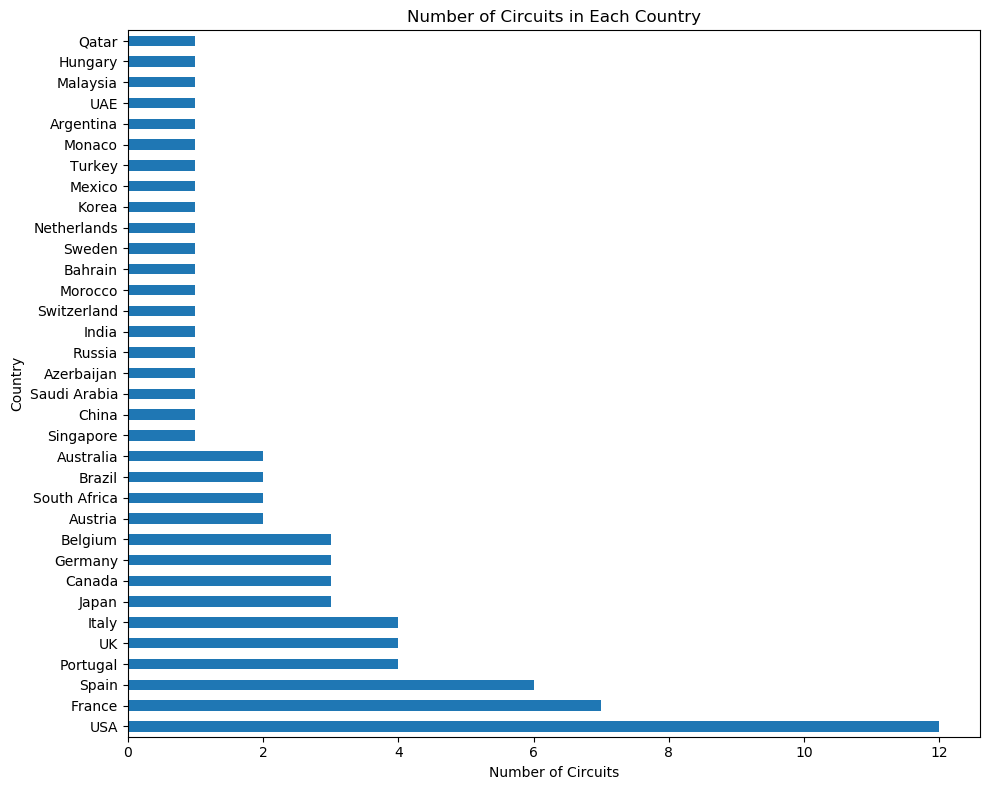

In [756]:
# Number of circuits in each country and plotting it

circuit = pd.DataFrame(circuits, columns=['country'])
country_counts = circuit['country'].value_counts()

plt.figure(figsize=(10,8))
country_counts.plot(kind='barh')
plt.xlabel('Number of Circuits')
plt.ylabel('Country')
plt.title('Number of Circuits in Each Country')
plt.tight_layout()
plt.show()

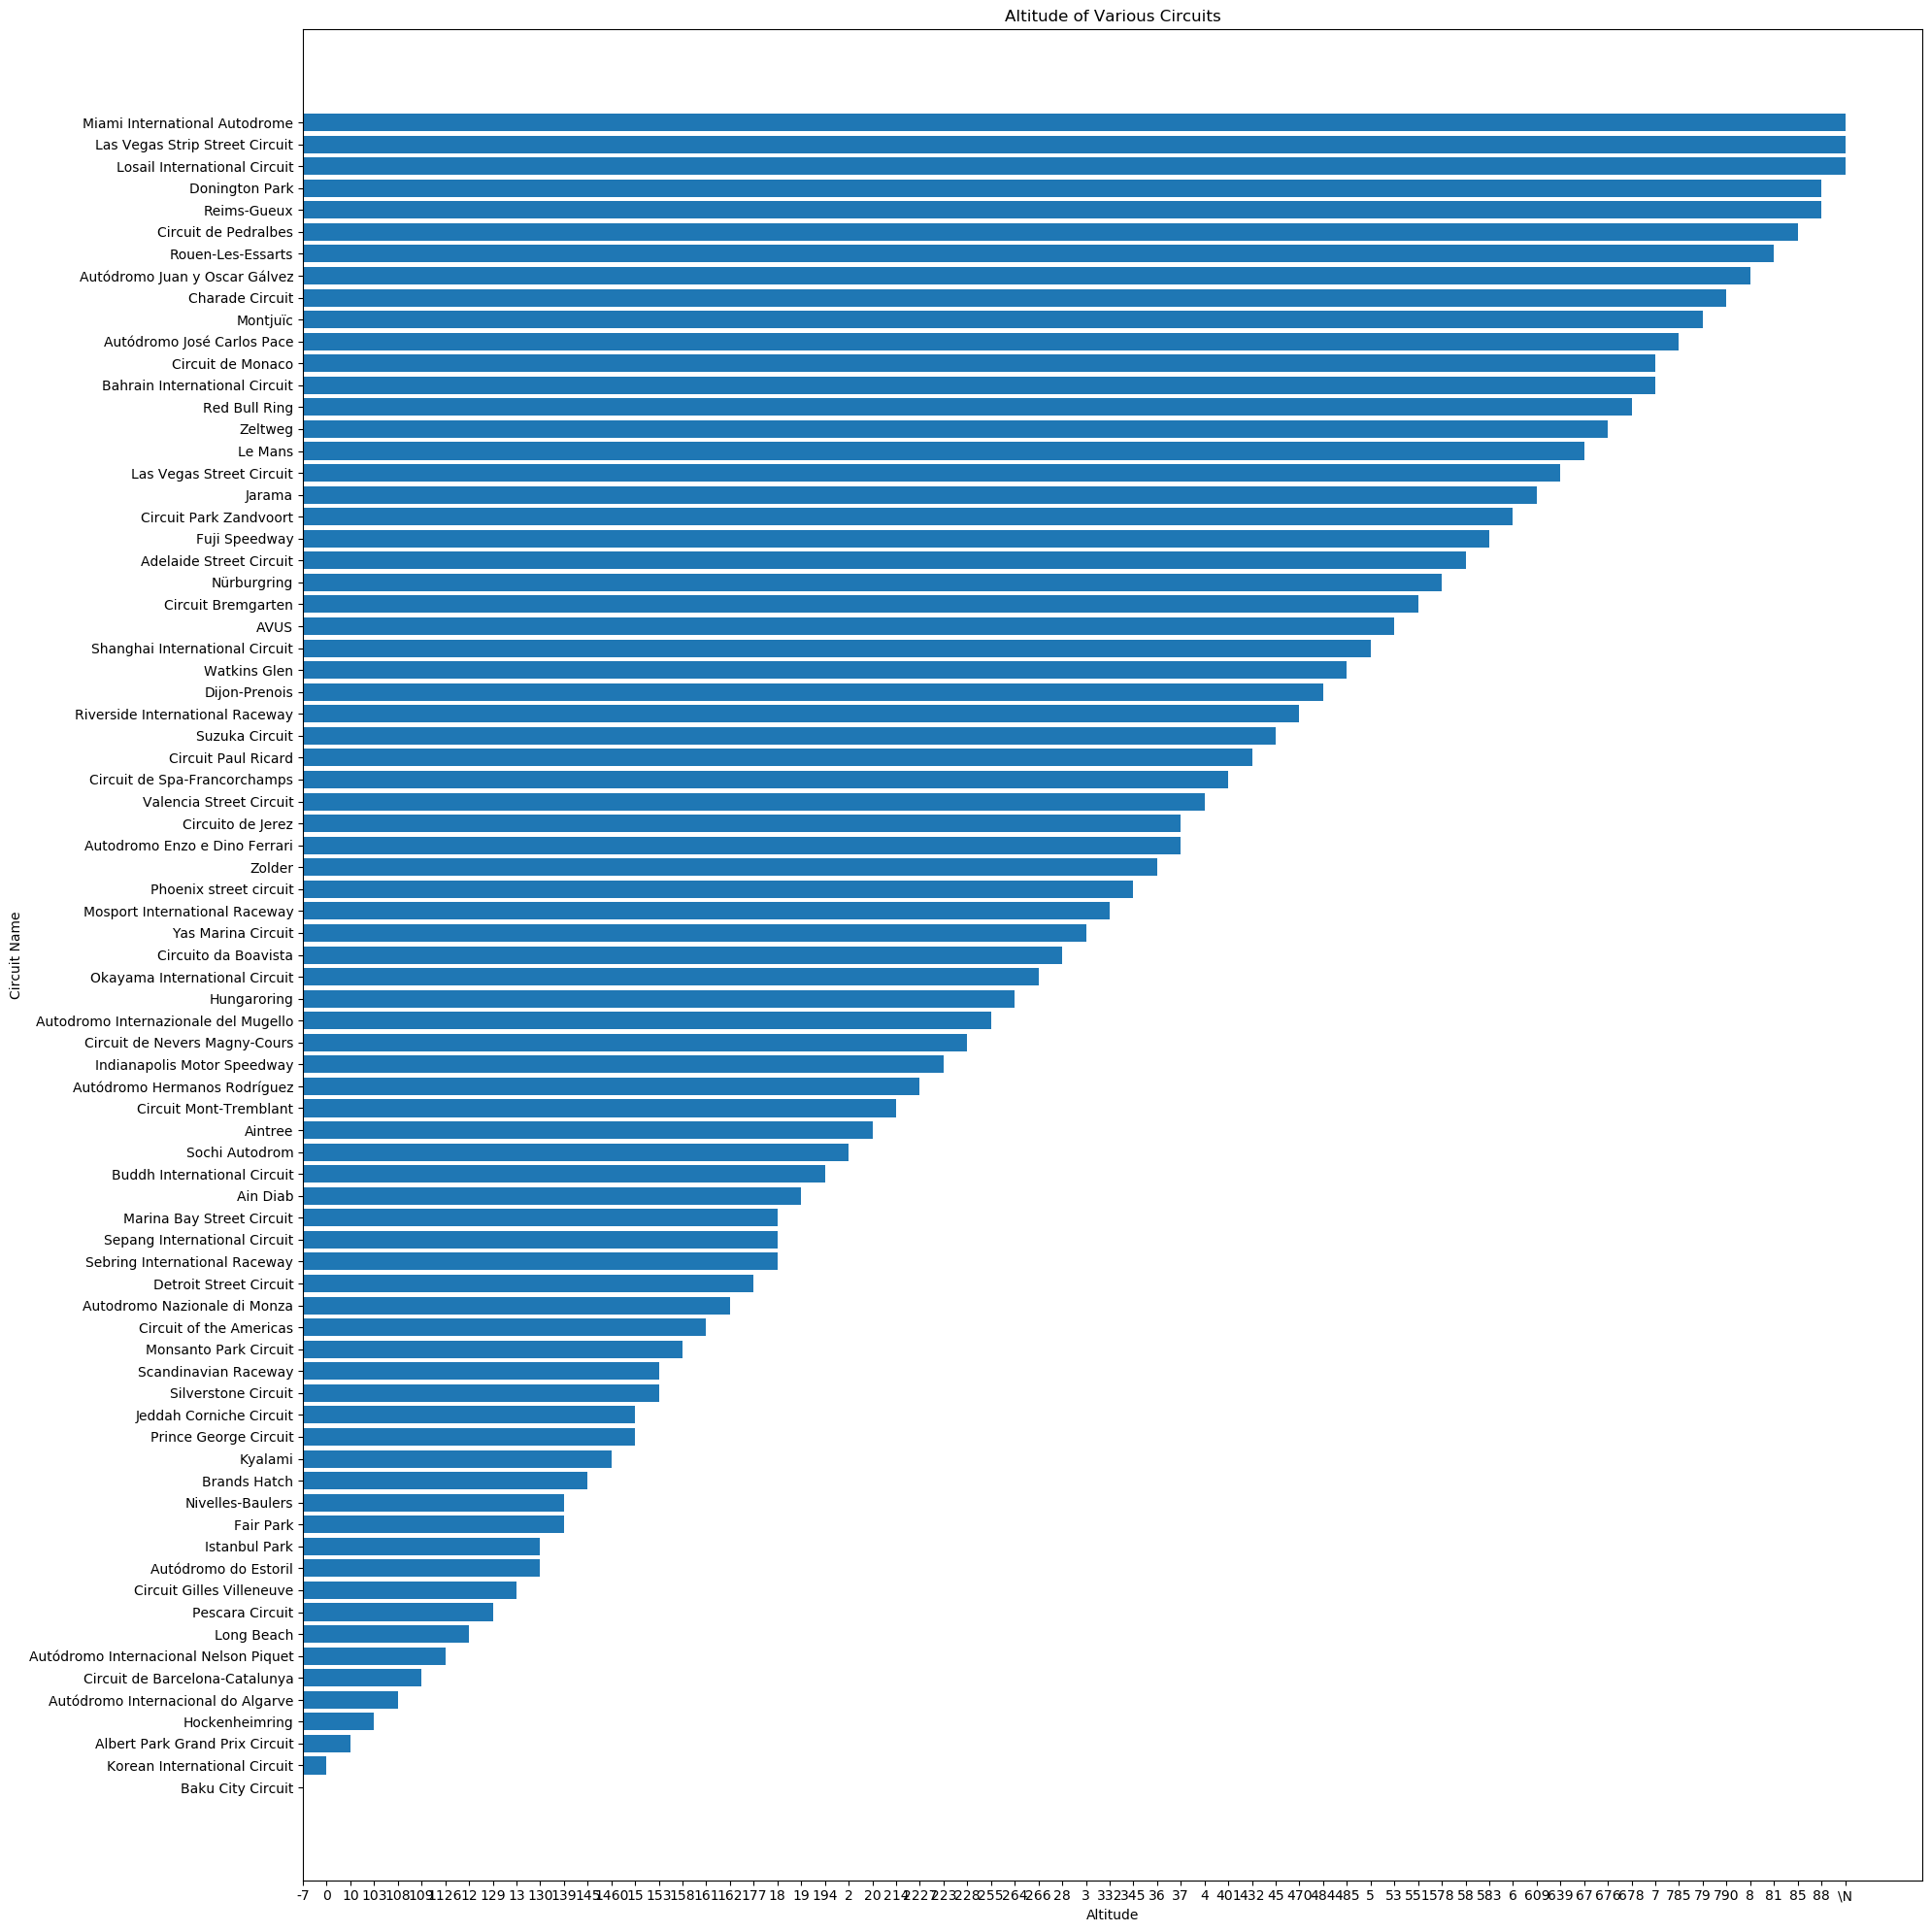

In [757]:
# Displaying all the circuits sorted by altitude
circuits_df_sorted = circuits.sort_values('alt', ascending=True)
plt.figure(figsize=(20, 20))
plt.barh(circuits_df_sorted['name'], circuits_df_sorted['alt'])
plt.xlabel('Altitude')
plt.ylabel('Circuit Name')
plt.title('Altitude of Various Circuits')
plt.tight_layout()
plt.show()

### Races

In [758]:
# Displaying the information of the races dataset
races.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [759]:
# Displaying the summary statistics of the circuits dataset
races.describe()

,raceId,year,round,circuitId
count,1101.000000,1101.000000,1101.000000,1101.000000
mean,553.355132,1992.020890,8.494096,23.700272
std,321.425790,20.296406,5.081089,19.346014
min,1.000000,1950.000000,1.000000,1.000000
25%,276.000000,1976.000000,4.000000,9.000000
50%,551.000000,1994.000000,8.000000,18.000000
75%,826.000000,2010.000000,12.000000,34.000000
max,1120.000000,2023.000000,22.000000,80.000000


In [760]:
# Describing the shape of the data
races.shape

(1101, 18)

In [761]:
# Displaying the circuits on a map for the year 2023
race_by_year = races[races['year'] == 2023]
race_by_year.drop(['url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)
race_by_year = race_by_year.merge(circuits[['circuitId', 'lat', 'lng']], on='circuitId', how='left')

map = folium.Map(location=[race_by_year['lat'].mean(), race_by_year['lng'].mean()], zoom_start=13)
for index, row in race_by_year.iterrows():
    folium.Marker(location=[row['lat'], row['lng']], popup=row['name']).add_to(map)
map

/var/folders/gy/c72q5khn4jv42tkd5s9tmlkr0000gn/T/ipykernel_23618/4059617206.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Constructor Results, Constructor Standings, Constructors

In [762]:
# Displaying the information of the constructor_results dataset
constructor_results.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12290 non-null  int64  
 1   raceId                12290 non-null  int64  
 2   constructorId         12290 non-null  int64  
 3   points                12290 non-null  float64
 4   status                12290 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 480.2+ KB


In [763]:
# Displaying the summary statistics of the constructor_results dataset
constructor_results.describe() 

,constructorResultsId,raceId,constructorId,points
count,12290.000000,12290.000000,12290.000000,12290.000000
mean,8191.007242,511.762815,44.661676,3.859967
std,5561.388146,302.677952,57.851043,7.555135
min,1.000000,1.000000,1.000000,0.000000
25%,3073.250000,281.000000,6.000000,0.000000
50%,6145.500000,477.000000,22.000000,0.000000
75%,13698.750000,722.000000,53.000000,4.000000
max,16789.000000,1110.000000,214.000000,66.000000


In [764]:
# Displaying the first 5 rows of the data
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [765]:
# Describing the shape of the data
constructor_results.shape

(12290, 5)

In [766]:
# Displaying the information of the constructor_standings dataset
constructor_standings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 713.9+ KB


In [767]:
# Displaying the summary statistics of the constructor_standings dataset
constructor_standings.describe()

,constructorStandingsId,raceId,constructorId,points,position,wins
count,13051.000000,13051.000000,13051.000000,13051.000000,13051.000000,13051.000000
mean,16674.407785,519.974638,48.470232,34.139108,7.271014,0.679182
std,8773.183393,296.269063,59.857491,77.227726,4.378793,1.823594
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,8798.500000,296.000000,6.000000,0.000000,4.000000,0.000000
50%,20348.000000,497.000000,25.000000,7.000000,7.000000,0.000000
75%,24674.500000,721.000000,57.000000,31.000000,10.000000,0.000000
max,28572.000000,1110.000000,214.000000,765.000000,22.000000,19.000000


In [768]:
# Displaying the first 5 rows of the data
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [769]:
# Describing all the unique constructorIds
constructor_standings.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   9,  11,  10,   8,  13,  14,
        17,  16,  15,  18,  19,  21,  22,  20,  24,  25,  26,  27,  29,
        28,  30,  31,  33,  32,  34,  35,  37,  36,  42,  41,  39,  40,
        44,  45,  46,  23,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  60,  59, 204,  61,  62, 182,  64,  63,  65,  66,
        67,  68,  69,  71,  70,  72,  73, 202,  75,  74,  76, 203,  80,
        78,  77,  79,  81,  82,  83,  84, 199, 200, 180, 201,  86, 187,
       198,  85, 191, 196, 167, 197, 183,  89, 190, 194, 195, 170, 176,
       184, 172, 189, 188,  91, 192, 181, 185,  94,  95,  92,  96,  97,
       177, 179, 173,  98,  99, 175,  87, 100, 174, 178, 101, 103, 123,
       118, 106, 169, 117, 105, 171, 104, 125, 127, 113, 168, 124, 193,
        90, 186,  93, 131, 205, 164, 166, 206, 207, 208,  12, 209, 210,
       211, 213, 214])

In [770]:
# Displaying the shape of the data
constructor_standings.shape

(13051, 7)

In [771]:
# Displaying the information of the constructors dataset
constructors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [772]:
# Displaying the summary statistics of the constructors dataset
constructors.describe()

,constructorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


In [773]:
# Displaying the first 5 rows of the data
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [774]:
# Describing all the unique constructorIds
constructors.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 167, 166, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [775]:
# Displaying the shape of the data
constructors.shape

(211, 5)

In [776]:
# Merge the constructor_standings and constructors data on constructorId
constructors_merged = pd.merge(constructor_standings, constructors, on='constructorId')

In [777]:
# Displaying the first 5 rows of the data
constructors_merged.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,7,19,1,24.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,18,20,1,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,29,21,1,34.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,40,22,1,42.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [778]:
# Displaying the shape of the data
constructors_merged.shape

(13051, 11)

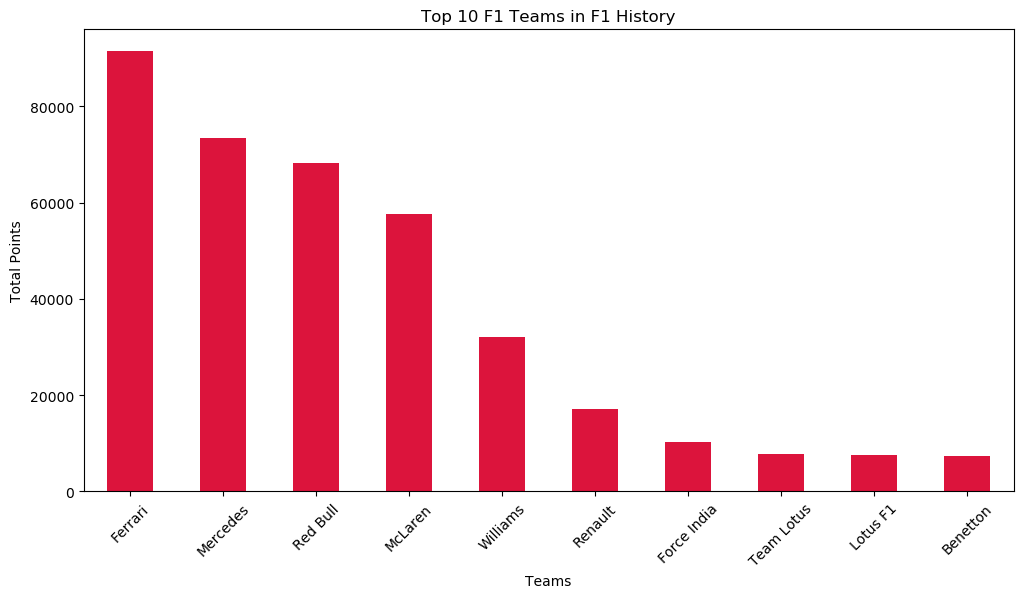

In [779]:
# Plotting the top 10 F1 teams in F1 history based on total points
top = constructors_merged.groupby('name')['points'].sum()
top = top.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top.plot(kind='bar', color='crimson')
plt.xlabel('Teams')
plt.ylabel('Total Points')
plt.title('Top 10 F1 Teams in F1 History')
plt.xticks(rotation=45)
plt.show()

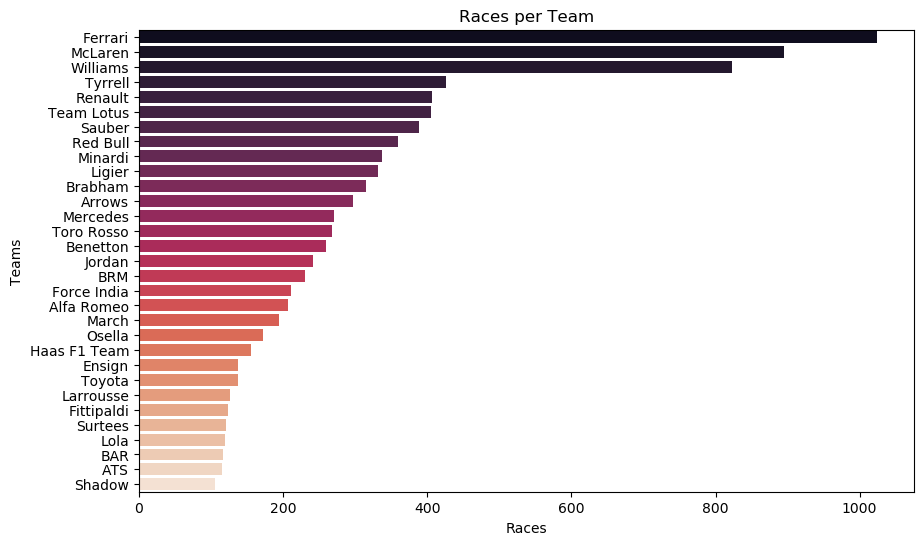

In [780]:
# Plotting the total number of races each team
teams = constructors_merged[['name','points','raceId']]
teams = teams.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
teams = teams[teams['races'] >= 100]
plt.figure(figsize=(10, 6))
sns.barplot(x='races', y='name', data=teams, palette='rocket') 
plt.xlabel('Races')  
plt.ylabel('Teams')  
plt.title('Races per Team')  
plt.show()

In [781]:
# Merge the constructors_merged and races on raceId becaes we want information about the races from the races dataset
plot_points = pd.merge(constructors_merged, races, on='raceId')

In [782]:
# Displaying the shape of the data
plot_points.shape

(13051, 28)

In [783]:
# Displaying the columns of the data
plot_points.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'constructorRef', 'name_x',
       'nationality', 'url_x', 'year', 'round', 'circuitId', 'name_y', 'date',
       'time', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time'],
      dtype='object')

In [784]:
# Merge the plot_points and circuits on circuitId becaes we want information about the circuits from the races dataset
plot_points_2 = pd.merge(plot_points, circuits, on='circuitId')

In [785]:
# Displaying the shape of the data
plot_points_2.shape

(13051, 36)

In [786]:
# Displaying the columns of the data
plot_points_2.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'constructorRef', 'name_x',
       'nationality', 'url_x', 'year', 'round', 'circuitId', 'name_y', 'date',
       'time', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'circuitRef', 'name', 'location', 'country', 'lat',
       'lng', 'alt', 'url'],
      dtype='object')

In [787]:
# Displaying the first 5 rows of the data
plot_points_2.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name_x,nationality,...,sprint_date,sprint_time,circuitRef,name,location,country,lat,lng,alt,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,3,9.0,2,2,0,williams,Williams,British,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,4,5.0,4,4,0,renault,Renault,French,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


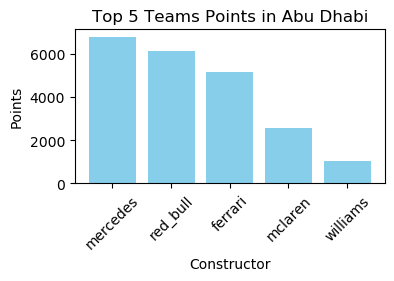

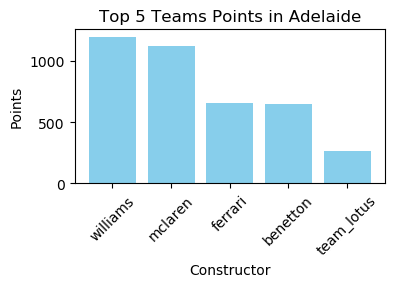

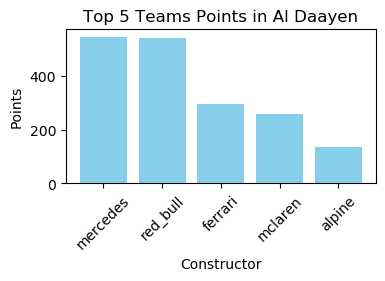

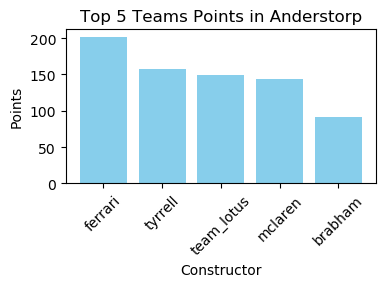

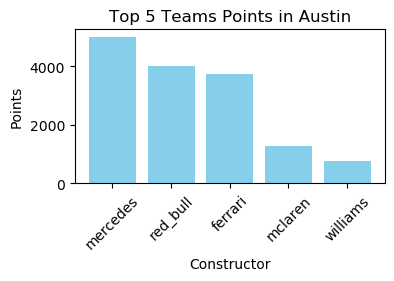

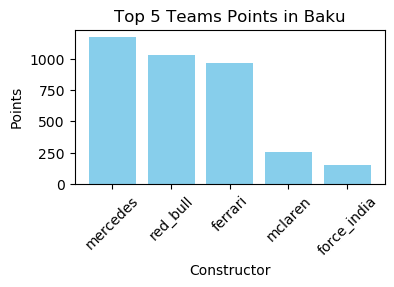

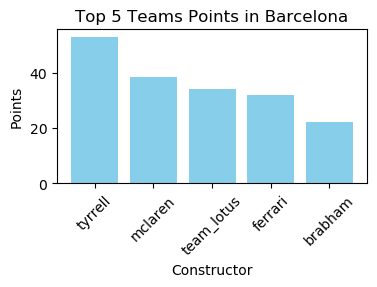

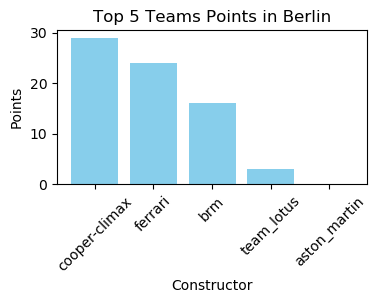

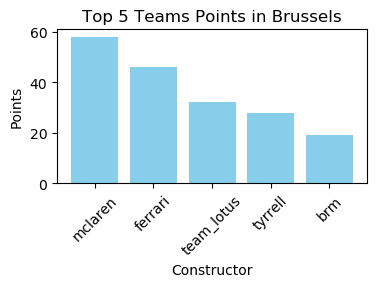

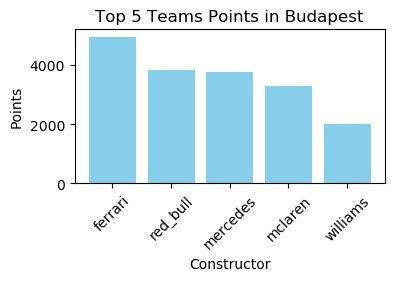

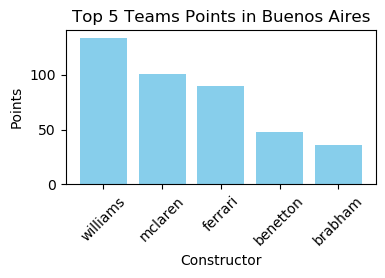

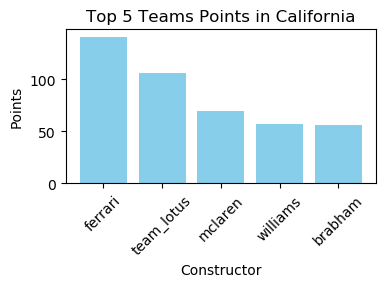

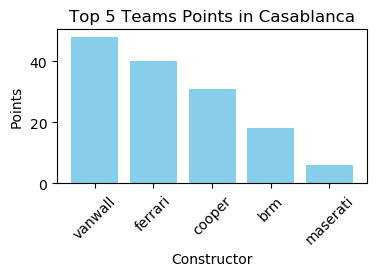

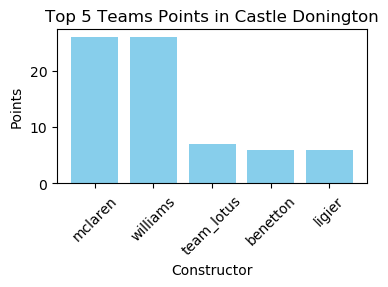

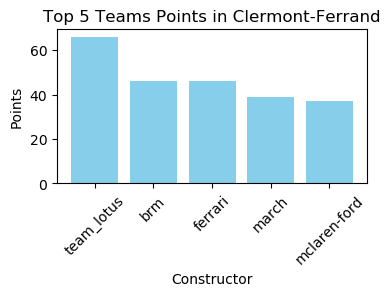

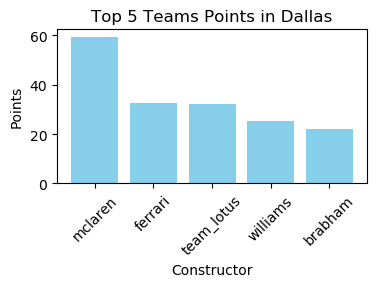

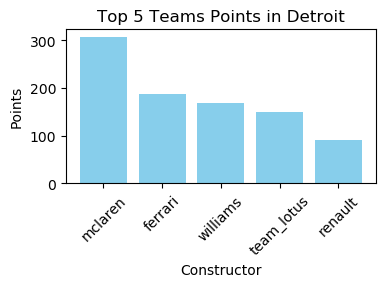

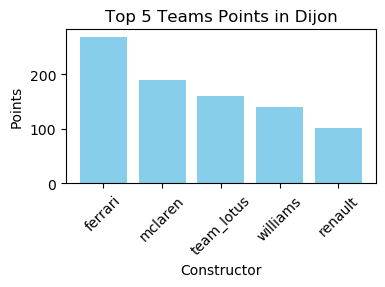

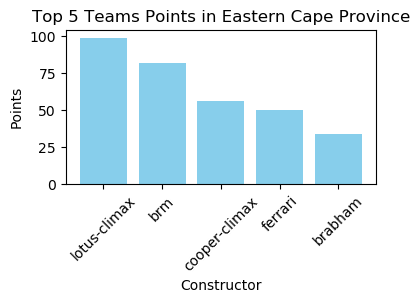

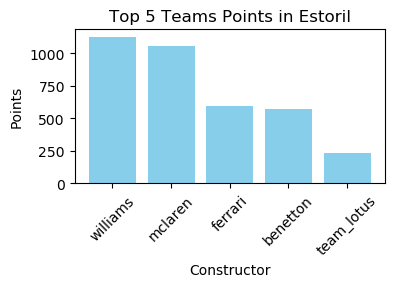

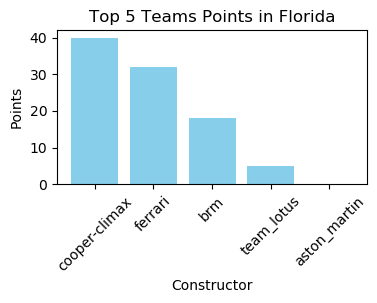

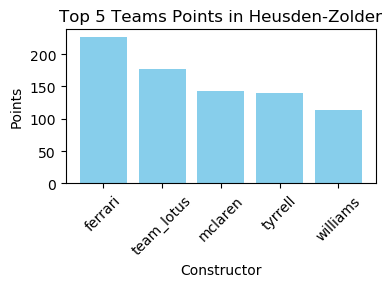

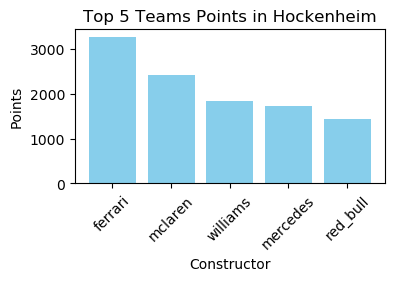

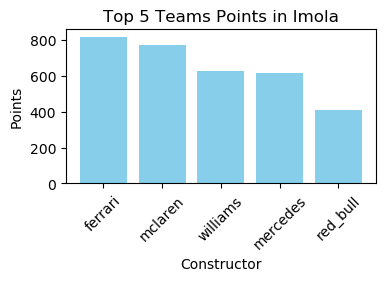

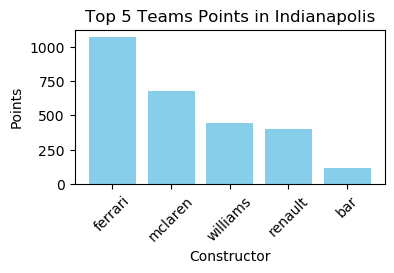

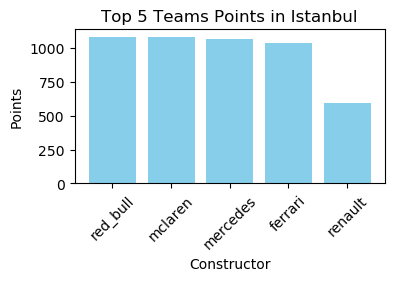

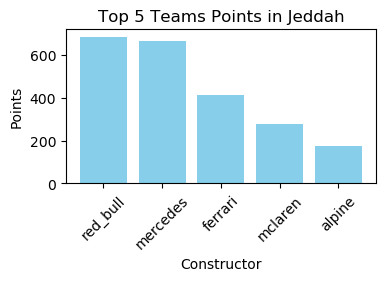

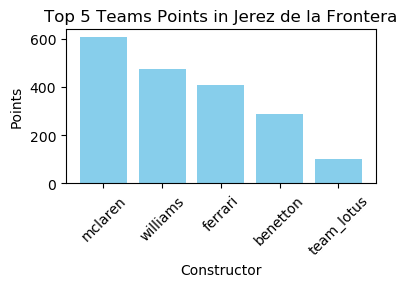

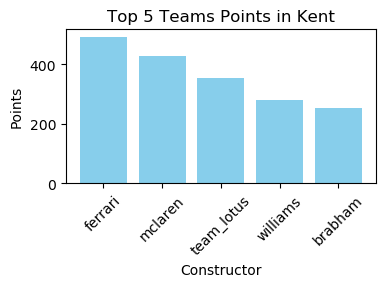

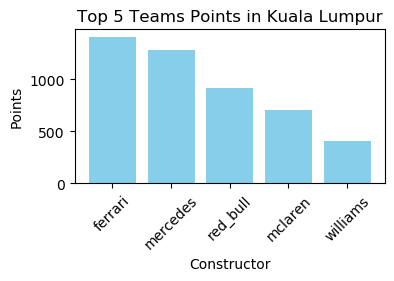

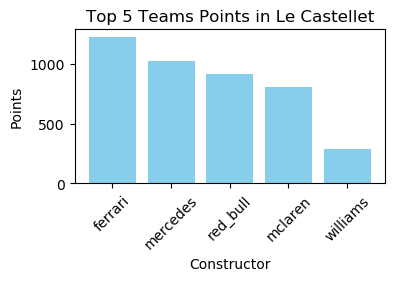

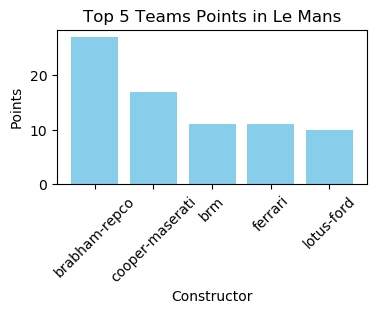

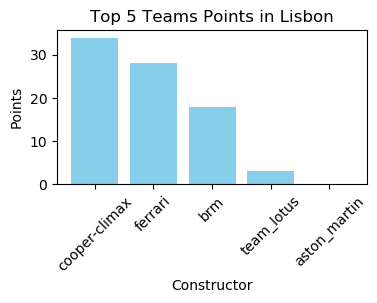

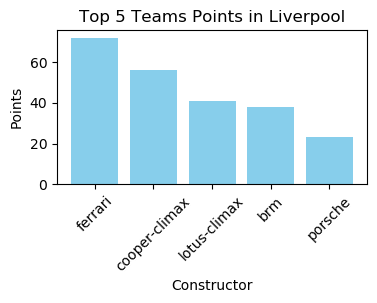

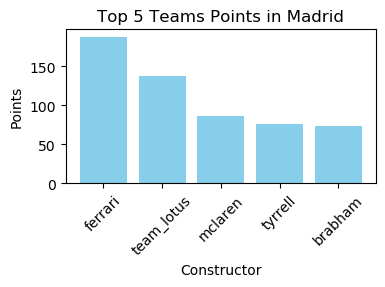

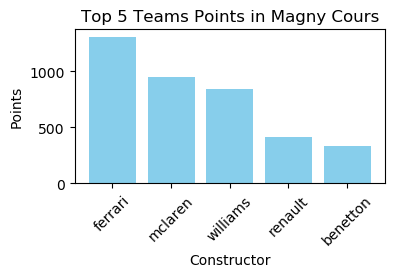

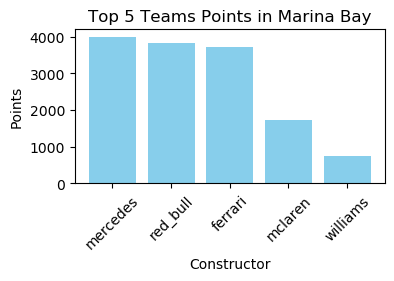

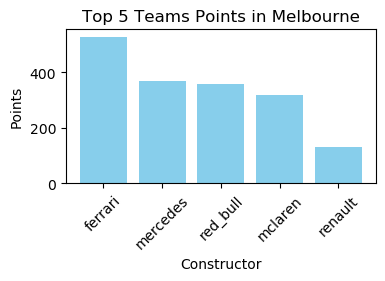

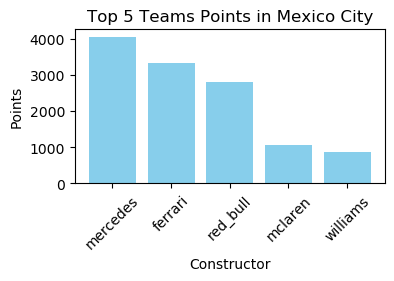

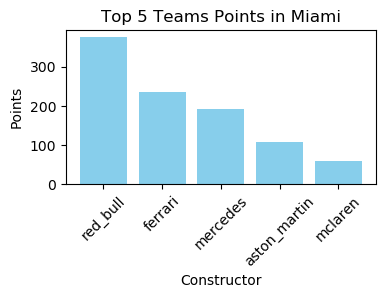

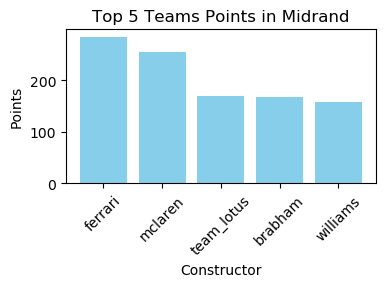

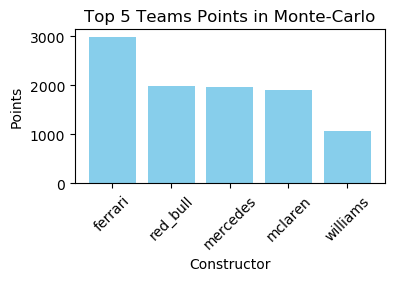

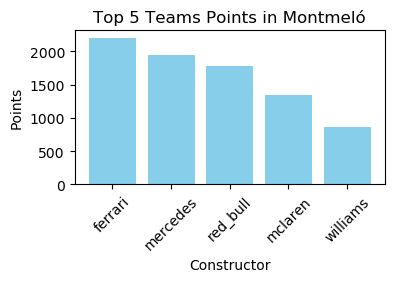

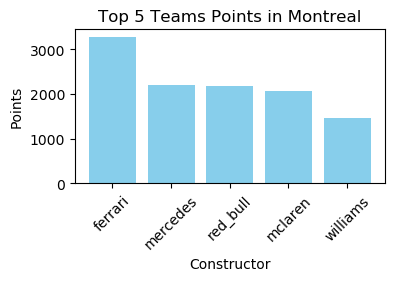

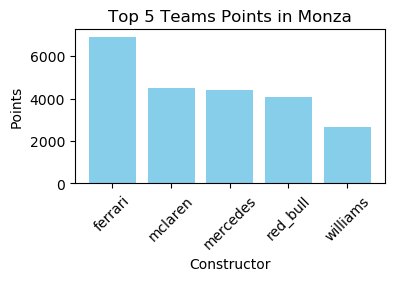

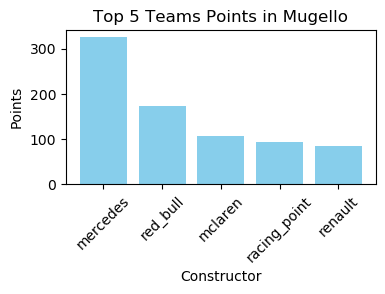

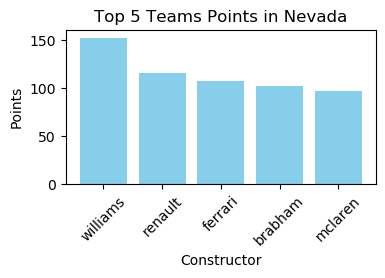

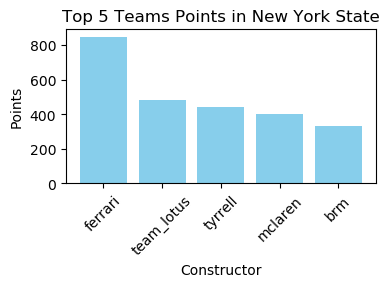

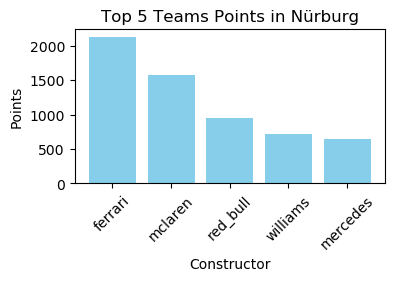

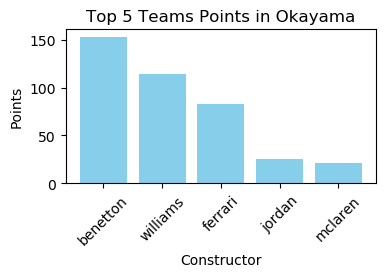

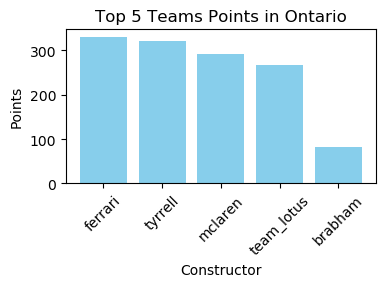

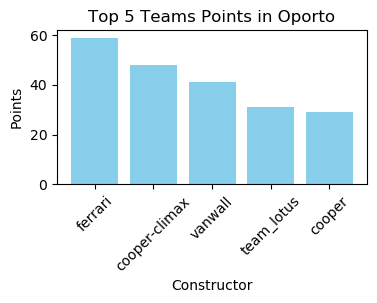

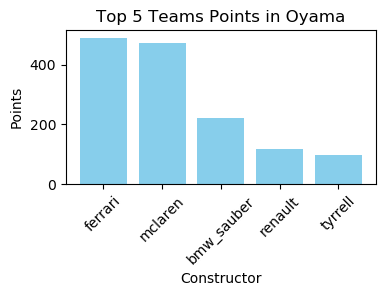

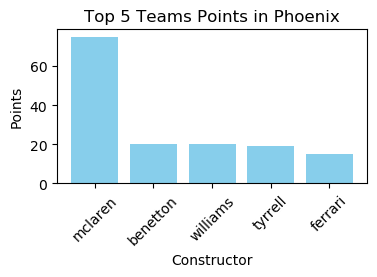

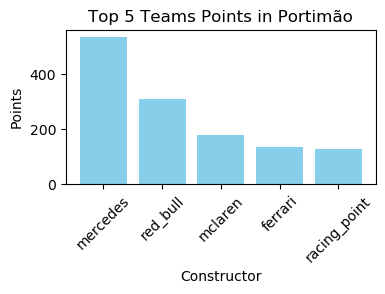

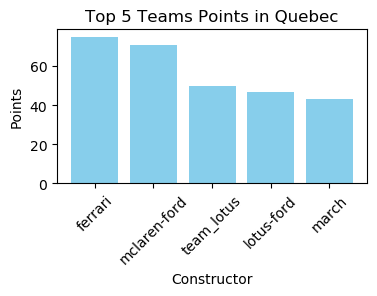

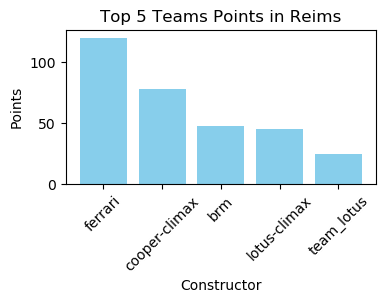

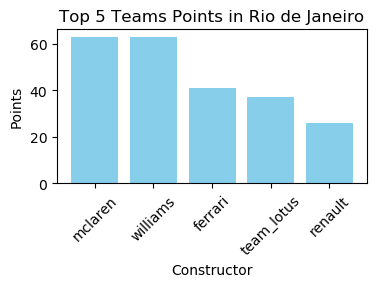

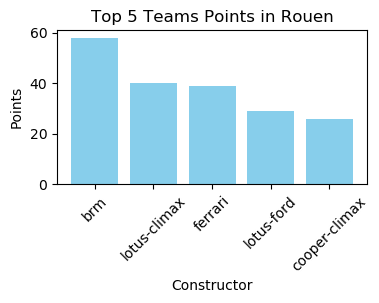

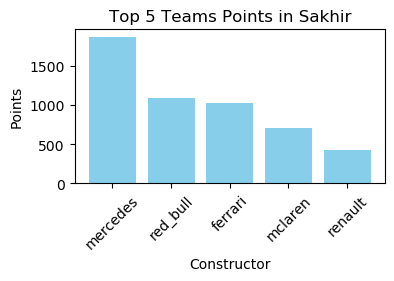

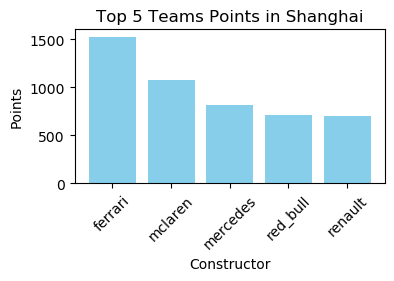

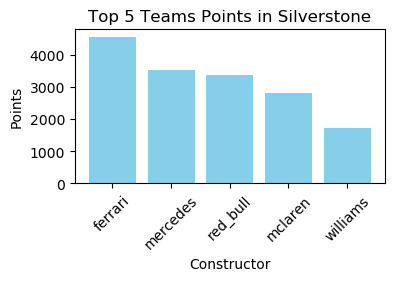

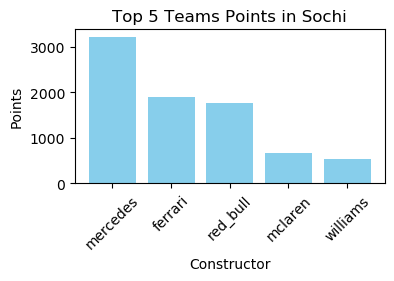

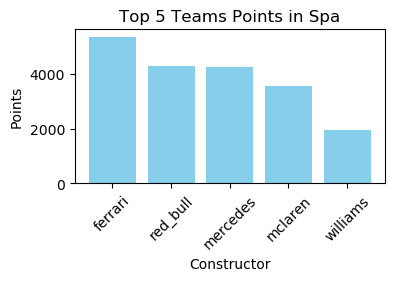

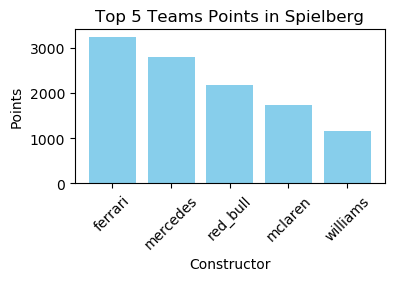

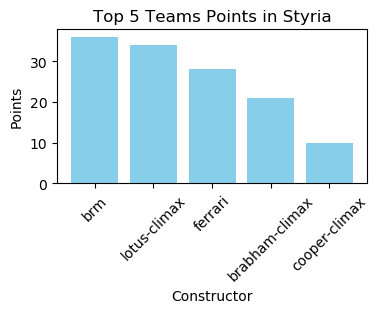

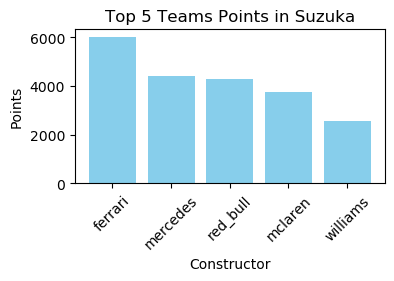

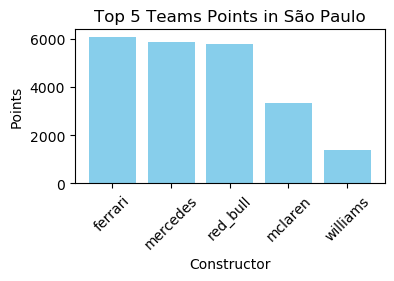

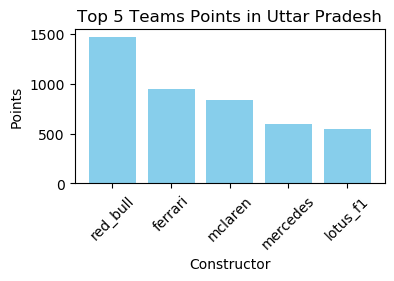

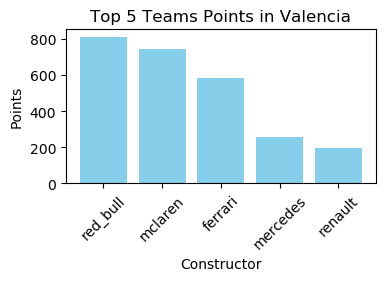

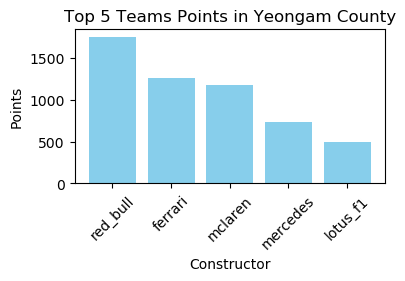

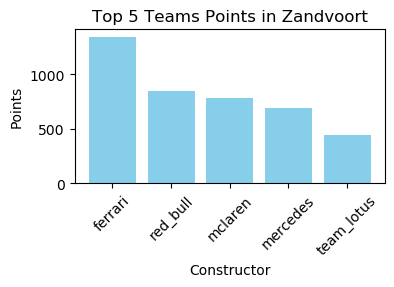

In [788]:
# Plotting the top 5 teams points in each location

grouped = plot_points_2.groupby(['location', 'constructorRef'])['points'].sum().reset_index()
grouped_sorted = grouped.sort_values(['location', 'points'], ascending=[True, False])

unique_locations = grouped_sorted['location'].unique()

for location in unique_locations:
    data = grouped_sorted[grouped_sorted['location'] == location]
    data_top5 = data.head(5)
    plt.figure(figsize=(4, 2))
    plt.bar(data_top5['constructorRef'], data_top5['points'], color='skyblue')
    plt.title(f'Top 5 Teams Points in {location}')
    plt.xlabel('Constructor')
    plt.ylabel('Points')
    
    plt.xticks(rotation=45)
    plt.show()



### Driver Standings, Drivers

In [789]:
# Displaying the information of the driver_standings dataset
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [790]:
# Displaying the summary statistics of the driver_standings dataset
driver_standings.describe() 

,driverStandingsId,raceId,driverId,points,position,wins
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


In [791]:
# Displaying the shape of the data
driver_standings.shape

(34124, 7)

In [792]:
# Displaying the first 5 rows of the data
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [793]:
# Displaying the information of the drivers dataset
drivers.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [794]:
# Displaying the summary statistics of the drivers dataset
drivers.describe()

,driverId
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


In [795]:
# Displaying the shape of the data
drivers.shape

(857, 9)

In [796]:
# Displaying the first 5 rows of the data
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [797]:
# Merge the driver_standings and drivers data on driverId
drivers_merged = pd.merge(results, drivers, on='driverId')

In [798]:
# Displaying the shape of the data
drivers_merged.shape

(26080, 26)

In [799]:
# Displaying the first 5 rows of the data
drivers_merged.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,209.033,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,203.969,11,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,204.323,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,222.085,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [800]:
# Displaying the top 10 drivers by points
top_drivers_by_points = drivers_merged.groupby('forename')['points'].sum().sort_values(ascending=False).head(10)
top_drivers_by_points

forename
Lewis        4540.5
Sebastian    3098.0
Max          2275.5
Fernando     2203.0
Nico         2121.5
Kimi         1873.0
Valtteri     1783.0
Michael      1573.0
Sergio       1365.0
Daniel       1307.0
Name: points, dtype: float64

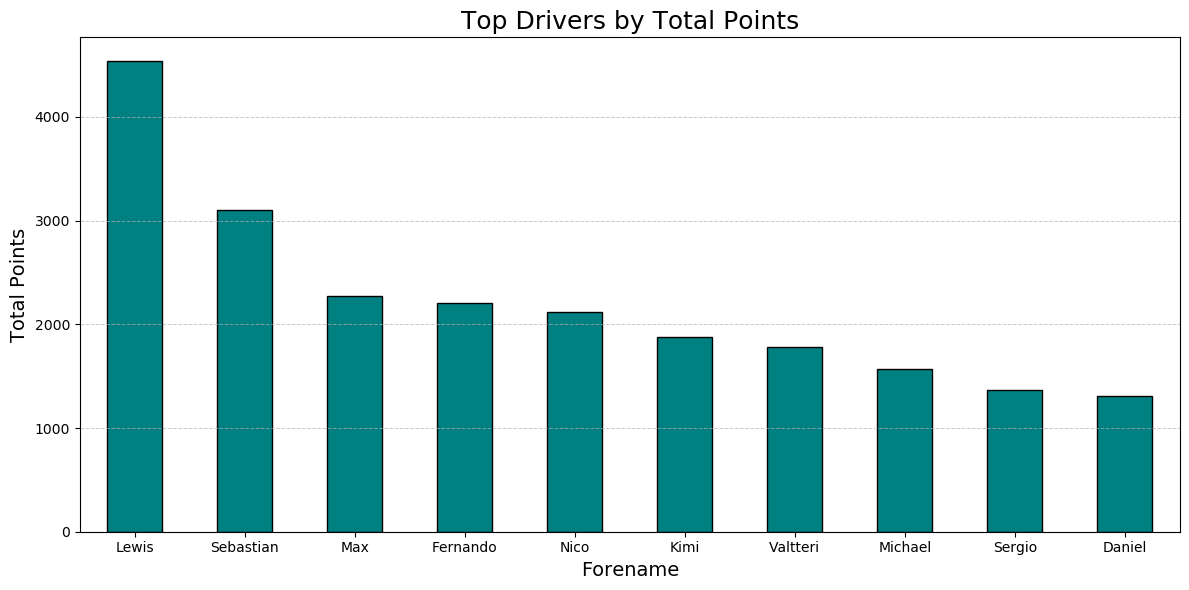

In [801]:
# Plotting the top 10 drivers by points

plt.figure(figsize=(12, 6))
top_drivers_by_points.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Top Drivers by Total Points', fontsize=18)
plt.xlabel('Forename', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

plt.show()

In [802]:
# Creating a new column full_name by combining the forename and surname
drivers_merged['full_name'] = drivers_merged['forename'] + ' ' + drivers_merged['surname']
drivers_merged.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url,full_name
0,1,18,1,1,22,1,1,1,1,10.0,...,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,11,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton


In [803]:
# Displaying the top 20 drivers with the most wins
drivers_merged['position'] = pd.to_numeric(drivers_merged['position'], errors='coerce')
position_1 = drivers_merged[drivers_merged['position'] == 1]
top_20_sum = position_1.groupby('full_name')['position'].sum().nlargest(20)
top_20_df = top_20_sum.reset_index()
top_20_df.columns = ['full_name', 'race_wins']
print(top_20_df)


             full_name  race_wins
0       Lewis Hamilton      103.0
1   Michael Schumacher       91.0
2     Sebastian Vettel       53.0
3          Alain Prost       51.0
4       Max Verstappen       45.0
5         Ayrton Senna       41.0
6      Fernando Alonso       32.0
7        Nigel Mansell       31.0
8       Jackie Stewart       27.0
9            Jim Clark       25.0
10          Niki Lauda       25.0
11         Juan Fangio       24.0
12       Nelson Piquet       23.0
13        Nico Rosberg       23.0
14          Damon Hill       22.0
15      Kimi Räikkönen       21.0
16       Mika Häkkinen       20.0
17       Stirling Moss       16.0
18       Jenson Button       15.0
19  Emerson Fittipaldi       14.0


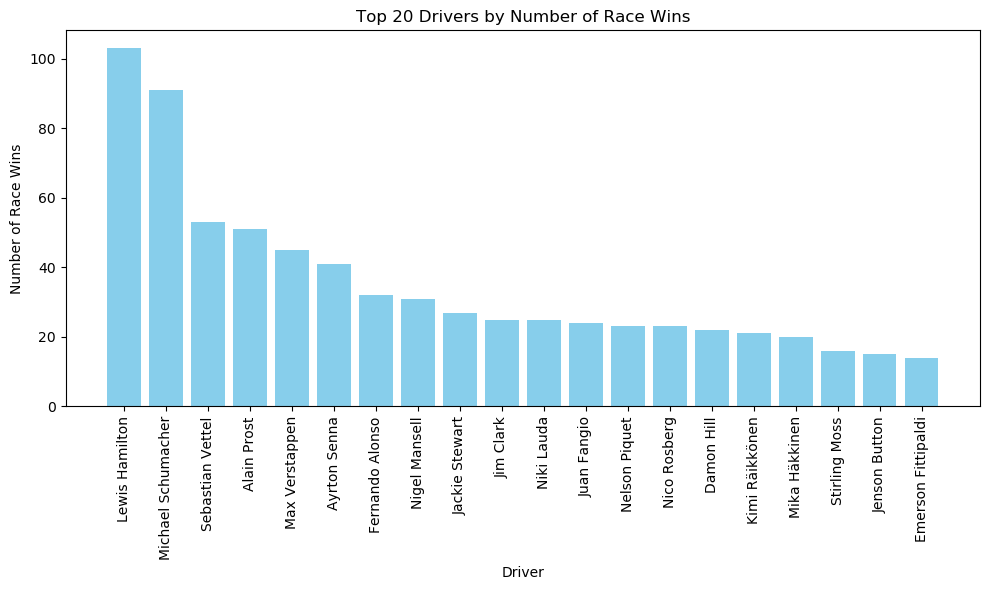

In [804]:
# Plotting the top 20 drivers with the most wins
plt.figure(figsize=(10, 6))
plt.bar(top_20_df['full_name'], top_20_df['race_wins'], color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Number of Race Wins')
plt.title('Top 20 Drivers by Number of Race Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [805]:
# Number of drivers from each country
nationality_counts = drivers_merged['nationality'].value_counts()
nationality_counts

British              4454
Italian              3418
French               3028
German               2396
Brazilian            1953
American             1291
Finnish              1159
Spanish               846
Australian            835
Austrian              690
Japanese              647
Belgian               591
Swedish               510
Dutch                 502
Swiss                 496
Canadian              464
Mexican               434
New Zealander         396
Argentine             373
Russian               213
South African         210
Danish                189
Monegasque            144
Colombian             125
Venezuelan            120
Polish                 99
Irish                  92
Thai                   90
Portuguese             87
Indian                 59
Chilean                37
Chinese                34
Hungarian              20
Rhodesian              18
Malaysian              16
Liechtensteiner        13
Indonesian             12
Uruguayan               7
East German 

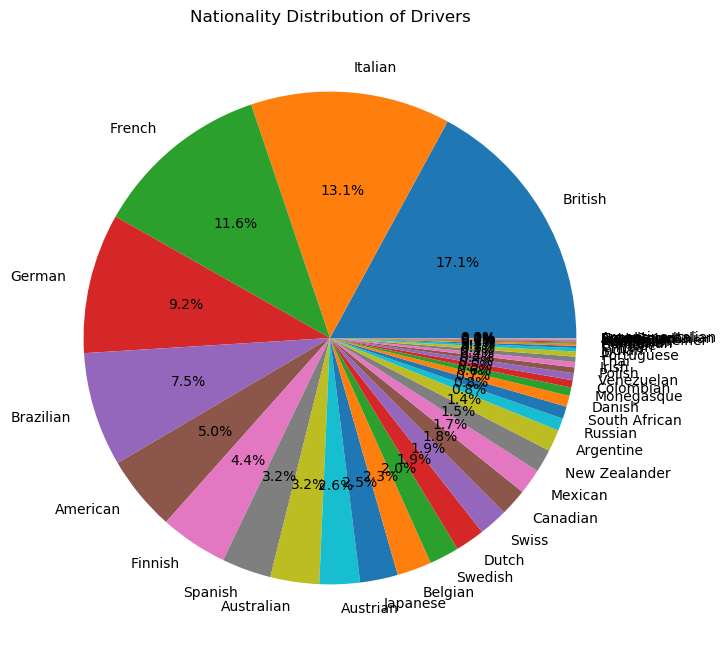

In [806]:
# Plotting the pie chart by nationality
plt.figure(figsize=(10, 8))
nationality_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Nationality Distribution of Drivers')
plt.ylabel('')
plt.show()

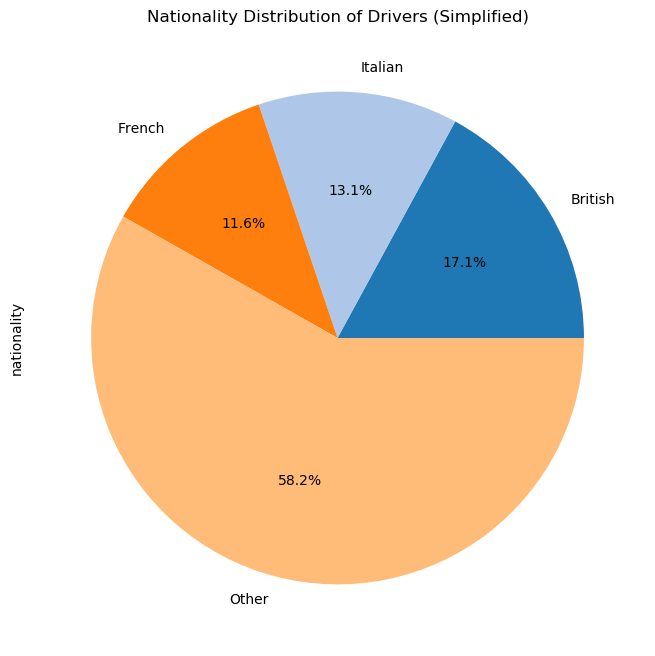

In [807]:
# Showing only the top 5 nationalities
threshold = 0.10 * drivers_merged.shape[0] 
other_nationalities = nationality_counts[nationality_counts < threshold]
nationality_counts = nationality_counts[nationality_counts >= threshold]
nationality_counts['Other'] = other_nationalities.sum()
plt.figure(figsize=(10, 8))
nationality_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Nationality Distribution of Drivers (Simplified)')
plt.show()

### Results, Status

In [808]:
# Displaying the information of the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [809]:
# Displaying the summary statistics of the results dataset
results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [810]:
# Displaying the shape of the data
results.shape

(26080, 18)

In [811]:
# Merging the results with the combined data previously created based on the raceId
plot_points_3 = pd.merge(plot_points_2, results, on='raceId')

In [812]:
# Displaying the shape of the data
plot_points_3.shape

(322718, 53)

In [813]:
# Displaying the first 5 rows of the data
plot_points_3.head()

,constructorStandingsId,raceId,constructorId_x,points_x,position_x,positionText_x,wins,constructorRef,name_x,nationality,...,positionOrder,points_y,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [814]:
# Displaying the information of the Status dataset
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [815]:
# Displaying the summary statistics of the Status dataset
status.describe()


,statusId
count,139.000000
mean,71.237410
std,41.092434
min,1.000000
25%,35.500000
50%,72.000000
75%,106.500000
max,141.000000


In [816]:
# Displaying the shape of the data
status.shape


(139, 2)

In [817]:
# Merging the plot_points_3 and status data on statusId
status_df = pd.merge(plot_points_3, status, on='statusId')

In [818]:
# Displaying the first 5 rows of the data
status_df.head()

,constructorStandingsId,raceId,constructorId_x,points_x,position_x,positionText_x,wins,constructorRef,name_x,nationality,...,points_y,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished
1,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished
2,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished
3,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished
4,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished


In [819]:
# Creating a altitude dataframe with only the status of Transmission, Engine and Overheating to see if there is any correlation
altitude = status_df[status_df['status'].isin(['Transmission','Engine','Overheating'])]
altitude.head()

,constructorStandingsId,raceId,constructorId_x,points_x,position_x,positionText_x,wins,constructorRef,name_x,nationality,...,points_y,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
131920,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,2.0,55,\N,\N,22,12,1:29.534,213.224,5,Engine
131921,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,1.0,53,\N,\N,20,4,1:27.903,217.180,5,Engine
131922,1,18,1,14.0,1,1,1,mclaren,McLaren,British,...,0.0,29,\N,\N,23,6,1:28.175,216.510,5,Engine
131923,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,...,2.0,55,\N,\N,22,12,1:29.534,213.224,5,Engine
131924,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,...,1.0,53,\N,\N,20,4,1:27.903,217.180,5,Engine


In [820]:
# Displaying the top 10 circuits with the most engine and transmission failures
circuit_altitudes = altitude.groupby(['name','alt'])['status'].count().sort_values(ascending = False).reset_index().head(10)
circuit_altitudes.rename(columns={'status':'engine & transmission failures'},inplace=True)
circuit_altitudes

,name,alt,engine & transmission failures
0,Autodromo Nazionale di Monza,162,3049
1,Hockenheimring,103,1818
2,Silverstone Circuit,153,1522
3,Red Bull Ring,678,1390
4,Circuit de Spa-Francorchamps,401,1321
5,Circuit de Monaco,7,1288
6,Circuit Gilles Villeneuve,13,1281
7,Autodromo Enzo e Dino Ferrari,37,1121
8,Circuit Park Zandvoort,6,1095
9,Watkins Glen,485,1093


In [821]:
# Plotting the top 10 circuits with the most engine and transmission failures based on altitude
df = circuit_altitudes.copy()
df['alt'] = pd.to_numeric(df['alt'], errors='coerce')

fig = px.scatter(df, x="alt", y="engine & transmission failures",
                 size="alt", color="name",
                 log_x=True, size_max=90)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Pitstops 

In [822]:
# Displaying the information of the pitStops dataset
pitStops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


In [823]:
# Displaying the summary statistics of the pitStops dataset
pitStops.describe()

,raceId,driverId,stop,lap,milliseconds
count,10089.000000,10089.000000,10089.000000,10089.000000,1.008900e+04
mean,962.774011,523.998910,1.759738,25.312023,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,2.620200e+04
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06


In [824]:
# Displaying the shape of the data
pitStops.shape 

(10089, 7)

In [825]:
# Diaplaying the min, avg and max pitstop duration for each driver
pitStops['duration'] = pd.to_numeric(pitStops['duration'], errors='coerce')
pitstop_summary = pitStops.groupby('driverId')['duration'].agg(['min', 'mean', 'max'], numeric_only=True)
pitstop_summary.rename(columns={'min': 'Min Pitstop', 'mean': 'Avg Pitstop', 'max': 'Max Pitstop'}, inplace=True)
df_pitstop_summary = pd.DataFrame.from_dict(pitstop_summary)
df_pitstop_summary = df_pitstop_summary.merge(drivers[['driverId', 'code']], on='driverId', how='inner')
df_pitstop_summary

,driverId,Min Pitstop,Avg Pitstop,Max Pitstop,code
0,1,13.173,23.477437,41.352,HAM
1,2,20.796,22.933320,26.281,HEI
2,3,16.623,23.266689,42.432,ROS
3,4,15.104,23.638879,57.601,ALO
4,5,18.801,24.608667,52.206,KOV
...,...,...,...,...,...
67,854,14.144,26.328151,51.222,MSC
68,855,14.128,25.022695,50.790,ZHO
69,856,17.033,23.215063,28.413,DEV
70,857,17.324,23.581375,31.534,PIA


In [826]:
# Plotting the pitstop durations by driver
driver_codes = df_pitstop_summary['code']
min_pitstops = df_pitstop_summary['Min Pitstop']
avg_pitstops = df_pitstop_summary['Avg Pitstop']
max_pitstops = df_pitstop_summary['Max Pitstop']

fig = go.Figure()

fig.add_trace(go.Bar(x=driver_codes, y=min_pitstops, name='Min Pitstop', marker_color='green'))
fig.add_trace(go.Bar(x=driver_codes, y=avg_pitstops, name='Avg Pitstop', marker_color='orange'))
fig.add_trace(go.Bar(x=driver_codes, y=max_pitstops, name='Max Pitstop', marker_color='red'))

fig.update_layout(
    xaxis_title='Driver',
    yaxis_title='Pitstop Duration (Seconds)',
    title='Pitstop Durations by Driver (Min, Avg, Max)',
    barmode='group',
    legend=dict(x=0.7, y=1.1),
    xaxis_tickangle=-45 
)

fig.show()

### Qualifying

In [827]:
# Displaying the information of the qualifying dataset
df_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


In [828]:
# Displaying the summary statistics of the qualifying dataset
df_qualifying.describe()

,qualifyId,raceId,driverId,constructorId,number,position
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000
mean,4920.076108,589.809985,314.514519,44.783597,18.114519,11.244931
std,2847.637640,421.207023,381.264736,70.843628,17.859565,6.290625
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2455.500000,119.500000,16.000000,4.000000,7.000000,6.000000
50%,4910.000000,856.000000,50.000000,9.000000,14.000000,11.000000
75%,7383.500000,981.000000,818.000000,28.000000,22.000000,17.000000
max,9872.000000,1110.000000,858.000000,214.000000,99.000000,28.000000


In [829]:
# Displaying the shape of the data
df_qualifying.shape

(9815, 9)

In [830]:
# Displaying the first 5 rows of the data
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [831]:
# Get the qualifying data for each driver
from builtins import map
df_qualifying = df_qualifying.merge(races[['raceId']], on='raceId', how='inner')
df_qualifying = df_qualifying.merge(drivers[['driverId', 'code', 'forename', 'surname']], on='driverId', how='inner')
df_qualifying['full_name'] = df_qualifying['forename'] + ' ' + df_qualifying['surname']
df_qualifying = df_qualifying.replace('\\N', '0:0')
def convert_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    mins, secs = map(float, time_str.split(':'))
    return mins * 60 + secs
df_qualifying['q1'] = df_qualifying['q1'].apply(convert_to_seconds)
df_qualifying['q2'] = df_qualifying['q2'].apply(convert_to_seconds)
df_qualifying['q3'] = df_qualifying['q3'].apply(convert_to_seconds)
df_qualifying


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,code,forename,surname,full_name
0,1,18,1,1,22,1,86.572,85.187,86.714,HAM,Lewis,Hamilton,Lewis Hamilton
1,26,19,1,1,22,4,95.392,94.627,96.709,HAM,Lewis,Hamilton,Lewis Hamilton
2,47,20,1,1,22,3,92.750,91.922,93.292,HAM,Lewis,Hamilton,Lewis Hamilton
3,71,21,1,1,22,5,81.366,80.825,82.096,HAM,Lewis,Hamilton,Lewis Hamilton
4,91,22,1,1,22,3,86.192,86.477,87.923,HAM,Lewis,Hamilton,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9810,9781,1106,857,1,81,9,82.190,79.659,91.349,PIA,Oscar,Piastri,Oscar Piastri
9811,9805,1107,857,1,81,13,65.683,65.605,0.000,PIA,Oscar,Piastri,Oscar Piastri
9812,9815,1108,857,1,81,3,89.874,87.845,87.092,PIA,Oscar,Piastri,Oscar Piastri
9813,9836,1109,857,1,81,4,78.464,77.571,76.905,PIA,Oscar,Piastri,Oscar Piastri


In [832]:
# Displaying the top 20 drivers with the most pole positions
position_1 = df_qualifying[df_qualifying['position'] == 1]
top_20_qualifying = position_1.groupby('full_name')['position'].count().nlargest(20)
top_20_qualifying_df = top_20_qualifying.reset_index()
top_20_qualifying_df.columns = ['full_name', 'pole_positions']
print(top_20_qualifying_df)

               full_name  pole_positions
0         Lewis Hamilton             107
1       Sebastian Vettel              57
2     Michael Schumacher              36
3           Nico Rosberg              30
4         Max Verstappen              28
5        Fernando Alonso              23
6         Kimi Räikkönen              19
7        Valtteri Bottas              19
8        Charles Leclerc              18
9           Felipe Massa              16
10            Damon Hill              13
11           Mark Webber              12
12         Mika Häkkinen              10
13    Rubens Barrichello              10
14         Jenson Button               8
15    Jacques Villeneuve               7
16       David Coulthard               6
17       Ralf Schumacher               5
18        Gerhard Berger               4
19  Giancarlo Fisichella               4


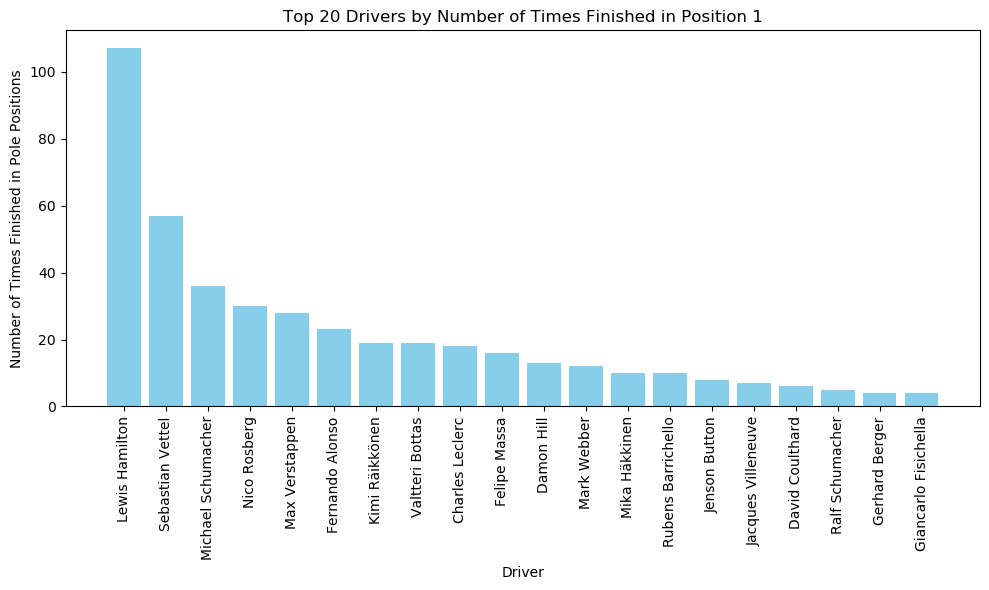

In [833]:
# Plotting the top 20 drivers with the most pole positions
plt.figure(figsize=(10, 6))
plt.bar(top_20_qualifying_df['full_name'], top_20_qualifying_df['pole_positions'], color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Number of Times Finished in Pole Positions')
plt.title('Top 20 Drivers by Number of Times Finished in Position 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Data Quality Report and Evaluation 

> 6 of the 10 drivers here are still racing <br>
> vettel , Raikkonen, rosberg and schumacher are retired <br>
> All of these drivers mainly raced for teams ferrari , mercedes and red bull <br>
> ham, bot, ros got most of the points at mercedes and vettel verstappen peres ricciardo at read bull and rest at ferrari <br> 